In [1]:
from src.algonauts.models import model_loaders
from src.algonauts.data_processors.image_transforms import transform_alexnet

# Experiment: AlexNet implementation trained on CIFAR-100

We will run the challenge pipeline on our AlexNet model trained on the CIFAR-100 dataset, which is a dataset with 100 classes. It was trained for 10 epochs. Further training caused overfitting, which is why we use the 10-epoch version.

In [2]:
experiment = 'alexnet_on_cifar100'
batch_size = 300

In [3]:
platform = 'jupyter_notebook' #@param ['colab', 'paperspace'] {allow-input: true}

if platform == 'jupyter_notebook':
    challenge_data_dir = '../data/algonauts_2023_challenge_data'
    exp_output_dir = f'../data/out/{experiment}'

if platform == 'paperspace':
    challenge_data_dir = '/storage/algonauts_2023_challenge_data'
    exp_output_dir = f'/notebooks/data/out/{experiment}'

### Load model

In [4]:
model_filename = 'alexnet_cifar.h5'
model_loader = lambda: model_loaders.load_from_file(model_filename, transform_alexnet)

### Print the model layers

In [5]:
model, _ = model_loader()
print(*(layer.name for layer in model.layers), sep=' -> ')
del model

Metal device set to: Apple M1 Pro


2023-03-29 10:55:15.740676: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-29 10:55:15.741862: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


conv2d_1 -> conv2d_1_bn -> conv2d_1_pool -> conv2d_2 -> conv2d_2_bn -> conv2d_2_pool -> conv2d_3 -> conv2d_3_bn -> conv2d_4 -> conv2d_4_bn -> conv2d_5 -> conv2d_5_bn -> conv2d_5_pool -> flatten_5 -> dense_15 -> dropout_10 -> dense_16 -> dropout_11 -> dense_17


## Select layers and subjects
Now let's define which layer(s) we will pick from, and which subject(s) to process.

Best layer for all vertices was found to be 'conv2d_5_pool'

In [6]:
layers = ['conv2d_5_pool']
subjects = [
    1, 2, 3, 4, 5, 6, 7, 8
    ]


## Run pipeline

Running for layer conv2d_5_pool
Running for subject 1
Training images: 9841
Test images: 159
LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)
Training images: 9841
Test images: 159
Training stimulus images: 8856

Validation stimulus images: 985

Test stimulus images: 159
Loading datasets...
Datasets loaded
Training PCA


  0%|          | 0/30 [00:00<?, ?it/s]2023-03-29 10:55:35.162290: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-29 10:55:35.557287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 26148.97it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 28038.34it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 1

LH Correlation: 0.31753084020075617 RH Correlation: 0.31920136432107277

LH median roi correlation: 
{'V1v': 0.4893999259590108, 'V1d': 0.522588793319239, 'V2v': 0.44998830048679317, 'V2d': 0.4434337198866797, 'V3v': 0.43953267517793565, 'V3d': 0.4324250395630848, 'hV4': 0.3522996192500872, 'EBA': 0.3146874313785815, 'FBA-1': 0.25069196292901247, 'FBA-2': None, 'mTL-bodies': None, 'OFA': 0.3263970525680169, 'FFA-1': 0.3359354751899677, 'FFA-2': None, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.346728127001446, 'PPA': 0.3335544242720472, 'RSC': 0.4318162142897, 'OWFA': 0.3464772994220986, 'VWFA-1': 0.21760695881165978, 'VWFA-2': 0.15373305316056424, 'mfs-words': 0.16099192987545508, 'mTL-words': None, 'early': 0.41509565396009834, 'midventral': 0.369239980475941, 'midlateral': 0.31917993255431265, 'midparietal': 0.3702848589693088, 'ventral': 0.25013513704442586, 'lateral': 0.31054169468730863, 'parietal': 0.2723550083835796, '

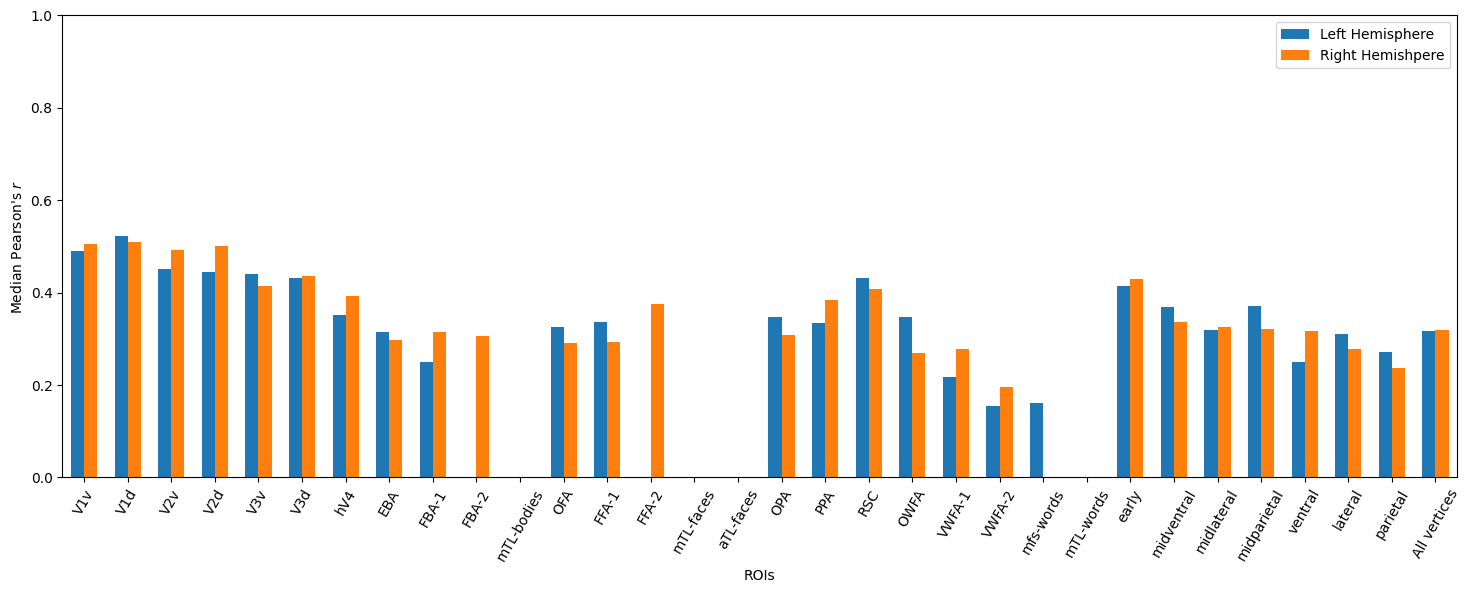

Running for subject 2
Training images: 9841
Test images: 159
LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)
Training images: 9841
Test images: 159
Training stimulus images: 8856

Validation stimulus images: 985

Test stimulus images: 159
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 30/30 [01:22<00:00,  2.75s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 23672.24it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 24740.55it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 2

LH Correlation: 0.3384407570423925 RH Correlation: 0.339461260760633

LH median roi correlation: 
{'V1v': 0.4357220818079597, 'V1d': 0.5332285431182329, 'V2v': 0.44758037950120577, 'V2d': 0.3975585668173194, 'V3v': 0.3115139793974438, 'V3d': 0.42421300352019864, 'hV4': 0.4368140885185203, 'EBA': 0.3346410869967358, 'FBA-1': None, 'FBA-2': 0.3479773146724995, 'mTL-bodies': None, 'OFA': 0.35577662502375884, 'FFA-1': 0.324973936188124, 'FFA-2': 0.2946245433845476, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.35942578488073906, 'PPA': 0.4505132733260271, 'RSC': 0.4828887837389646, 'OWFA': 0.28734301604625945, 'VWFA-1': 0.30444908853358166, 'VWFA-2': 0.19955337360132458, 'mfs-words': 0.26738343593351765, 'mTL-words': None, 'early': 0.36481430240918367, 'midventral': 0.3491943413626579, 'midlateral': 0.37700883545599595, 'midparietal': 0.30325039180451846, 'ventral': 0.3525384245389169, 'lateral': 0.32468939388205764, 'parietal': 0.2

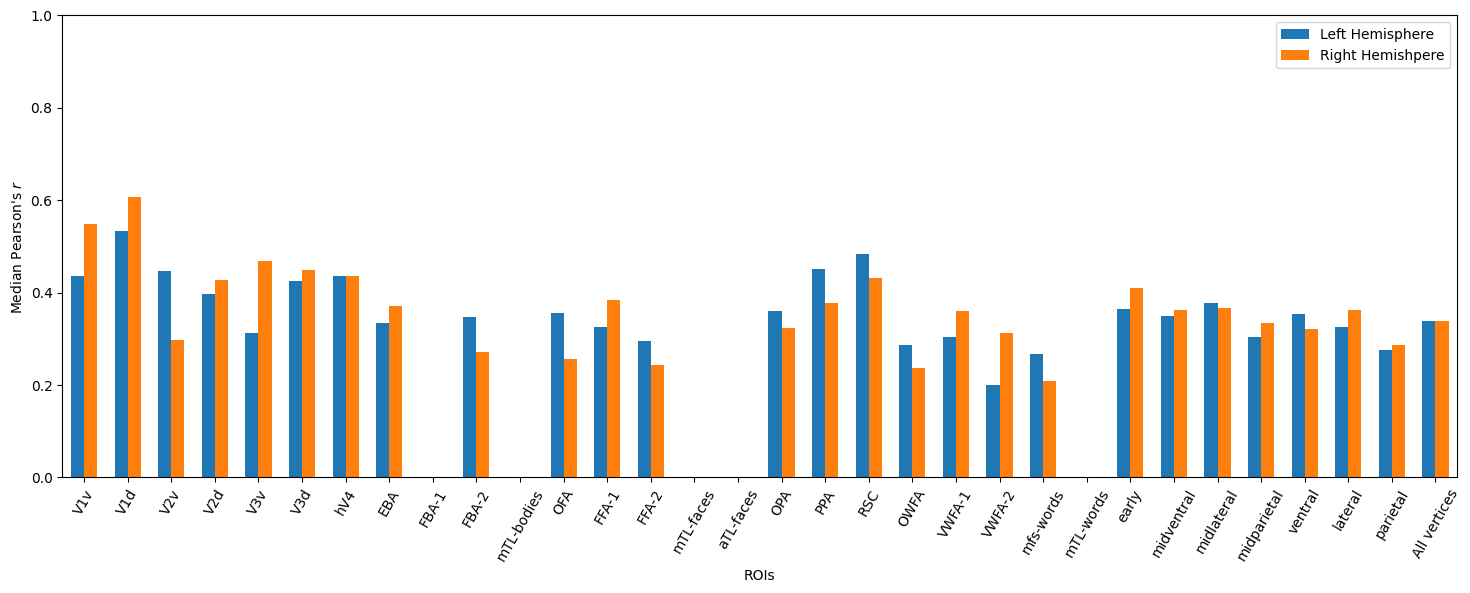

Running for subject 3
Training images: 9082
Test images: 293
LH training fMRI data shape:
(9082, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9082, 20544)
(Training stimulus images × RH vertices)
Training images: 9082
Test images: 293
Training stimulus images: 8173

Validation stimulus images: 909

Test stimulus images: 293
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 28/28 [01:20<00:00,  2.89s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 27879.86it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 28222.72it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 3

LH Correlation: 0.26304137123608723 RH Correlation: 0.2716728805982628

LH median roi correlation: 
{'V1v': 0.48711955665086176, 'V1d': 0.4568392242222964, 'V2v': 0.4407999407850646, 'V2d': 0.3534276373327413, 'V3v': 0.3804856637570331, 'V3d': 0.2688239125996582, 'hV4': 0.3139858792257637, 'EBA': 0.2865587454042556, 'FBA-1': 0.1920641765403986, 'FBA-2': 0.31846219351599947, 'mTL-bodies': None, 'OFA': 0.3139858792257637, 'FFA-1': 0.29072075699107996, 'FFA-2': 0.26092852304727754, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.2979445197885267, 'PPA': 0.28564092368023547, 'RSC': 0.2211158753203893, 'OWFA': 0.30149066652899986, 'VWFA-1': 0.17083940926768337, 'VWFA-2': 0.1470635568436352, 'mfs-words': 0.20706033097317092, 'mTL-words': None, 'early': 0.29426554332300203, 'midventral': 0.36808375128902654, 'midlateral': 0.2740703878881441, 'midparietal': 0.25250525548124614, 'ventral': 0.24132550747624243, 'lateral': 0.2650166477355995

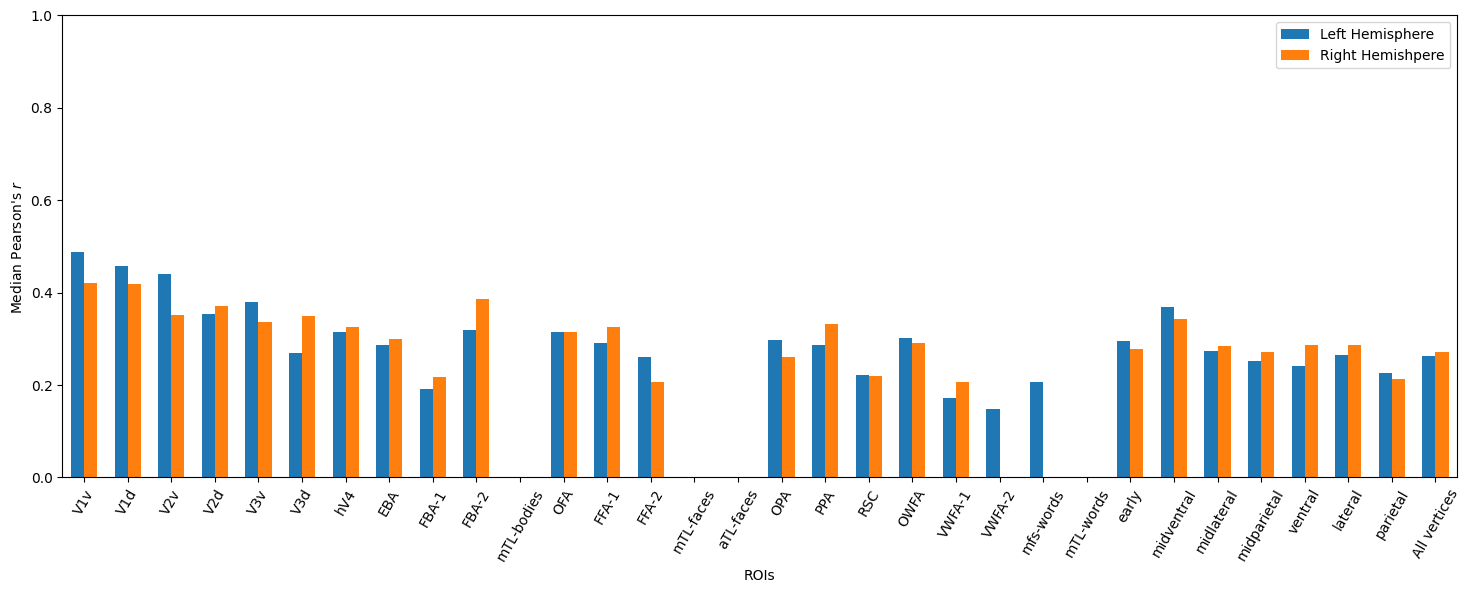

Running for subject 4
Training images: 8779
Test images: 395
LH training fMRI data shape:
(8779, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(8779, 20544)
(Training stimulus images × RH vertices)
Training images: 8779
Test images: 395
Training stimulus images: 7901

Validation stimulus images: 878

Test stimulus images: 395
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 27/27 [01:27<00:00,  3.25s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 2/2 [00:01<00:00,  1.60it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 26572.00it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 27585.55it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 4

LH Correlation: 0.22142575611794768 RH Correlation: 0.264104844315041

LH median roi correlation: 
{'V1v': 0.46067896610236003, 'V1d': 0.41111421825410815, 'V2v': 0.3912091819826279, 'V2d': 0.4220260233001028, 'V3v': 0.3101354117898844, 'V3d': 0.27164458992433727, 'hV4': 0.2521983726121479, 'EBA': 0.2048022818447765, 'FBA-1': None, 'FBA-2': 0.16995625761614394, 'mTL-bodies': None, 'OFA': 0.2544770063726588, 'FFA-1': 0.26230514281739653, 'FFA-2': 0.22493720478640747, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.2371987777559473, 'PPA': 0.3012343776782045, 'RSC': 0.3147816873373777, 'OWFA': 0.20297932471423602, 'VWFA-1': 0.14791669951706016, 'VWFA-2': 0.16451865583331587, 'mfs-words': 0.1991123888335804, 'mTL-words': None, 'early': 0.2770259096067945, 'midventral': 0.26099716218335955, 'midlateral': 0.19842400686182848, 'midparietal': 0.2659020746795676, 'ventral': 0.23053175080626642, 'lateral': 0.17981141688645041, 'parietal': 

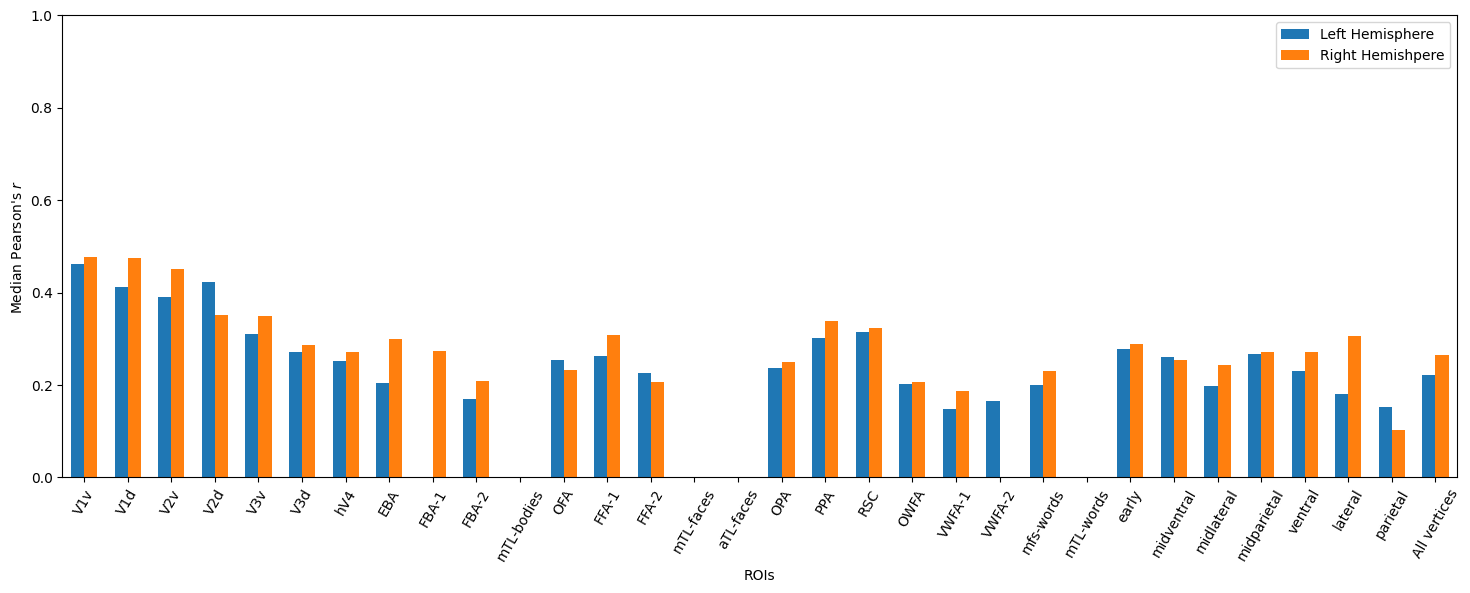

Running for subject 5
Training images: 9841
Test images: 159
LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)
Training images: 9841
Test images: 159
Training stimulus images: 8856

Validation stimulus images: 985

Test stimulus images: 159
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 30/30 [01:34<00:00,  3.17s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 25367.14it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 26901.43it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 5

LH Correlation: 0.3459338884598705 RH Correlation: 0.329493394941768

LH median roi correlation: 
{'V1v': 0.4854266829548032, 'V1d': 0.47940640818636, 'V2v': 0.5152438765506843, 'V2d': 0.3709265668637787, 'V3v': 0.4127587658236801, 'V3d': 0.3571599443028785, 'hV4': 0.37125715887014965, 'EBA': 0.29686728448490696, 'FBA-1': 0.2900511358560379, 'FBA-2': 0.34962034449298907, 'mTL-bodies': None, 'OFA': 0.32535511967445285, 'FFA-1': 0.34340681679205054, 'FFA-2': 0.3603361192079306, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.3949019217555253, 'PPA': 0.4192861866529392, 'RSC': 0.3785284884670846, 'OWFA': 0.29524486179270465, 'VWFA-1': 0.31549550341521776, 'VWFA-2': 0.2704536506975196, 'mfs-words': 0.3611139196031707, 'mTL-words': None, 'early': 0.4026782600201053, 'midventral': 0.3776288515616645, 'midlateral': 0.26367352193849874, 'midparietal': 0.3981264460035373, 'ventral': 0.35583250724867754, 'lateral': 0.31544580028149505, 'par

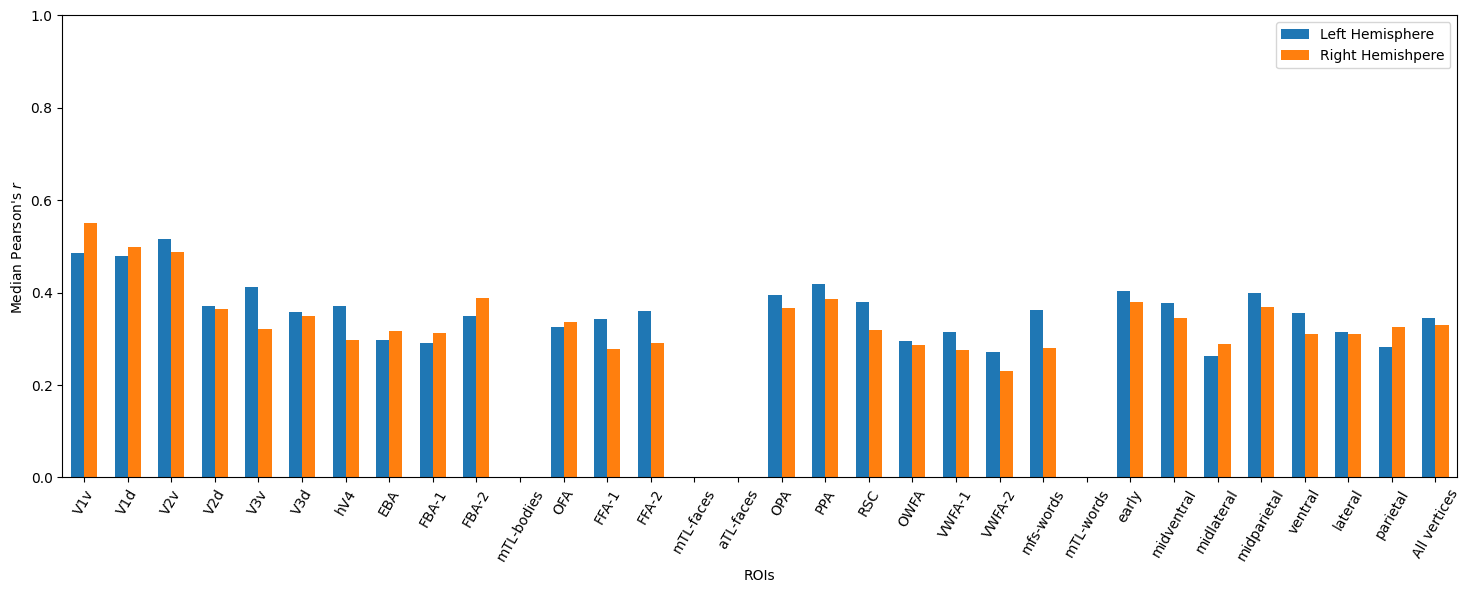

Running for subject 6
Training images: 9082
Test images: 293
LH training fMRI data shape:
(9082, 18978)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9082, 20220)
(Training stimulus images × RH vertices)
Training images: 9082
Test images: 293
Training stimulus images: 8173

Validation stimulus images: 909

Test stimulus images: 293
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 28/28 [01:13<00:00,  2.64s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 18978/18978 [00:00<00:00, 25701.28it/s]


Calculating right hemisphere correlations...


100%|██████████| 20220/20220 [00:00<00:00, 28321.28it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 6

LH Correlation: 0.2048398754530787 RH Correlation: 0.24254916353259798

LH median roi correlation: 
{'V1v': 0.4550661667781193, 'V1d': 0.4141041502834889, 'V2v': 0.44724811390464014, 'V2d': 0.3850386018152982, 'V3v': 0.351850745547421, 'V3d': 0.27400978130650766, 'hV4': 0.28748420310585593, 'EBA': 0.1985620682274727, 'FBA-1': 0.24644344708712948, 'FBA-2': 0.083569857362314, 'mTL-bodies': None, 'OFA': 0.26359038652847894, 'FFA-1': 0.277794638321037, 'FFA-2': 0.10377273520186493, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.23651734006873107, 'PPA': 0.23141659984814197, 'RSC': 0.16573150922953397, 'OWFA': 0.203029078278625, 'VWFA-1': 0.18044840209393204, 'VWFA-2': 0.11256692714036148, 'mfs-words': 0.1911145723009798, 'mTL-words': -0.002828957601129449, 'early': 0.3036350066883696, 'midventral': 0.2688818834714743, 'midlateral': 0.24533379734557798, 'midparietal': 0.20913413284264412, 'ventral': 0.15121639812906373, 'lateral': 0.1

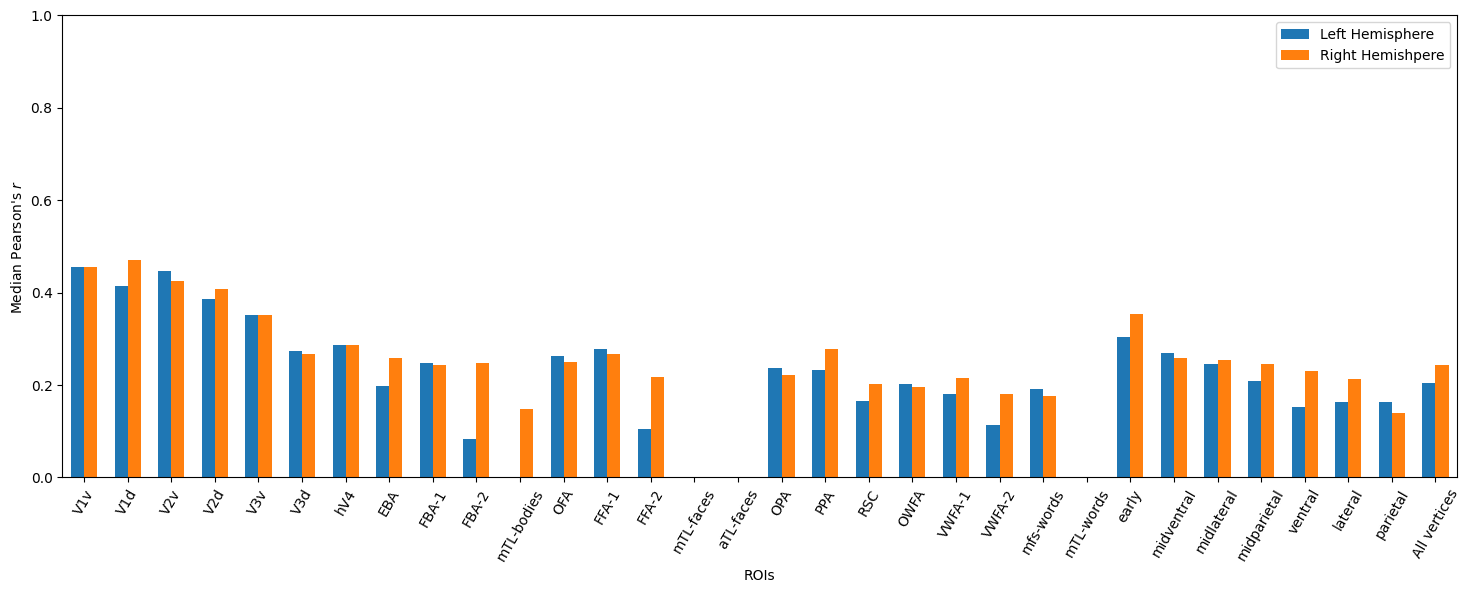

Running for subject 7
Training images: 9841
Test images: 159
LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)
Training images: 9841
Test images: 159
Training stimulus images: 8856

Validation stimulus images: 985

Test stimulus images: 159
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 23928.78it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 27047.23it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 7

LH Correlation: 0.24430244815202112 RH Correlation: 0.24808774468663336

LH median roi correlation: 
{'V1v': 0.37969699864310485, 'V1d': 0.40460218910217804, 'V2v': 0.43615814892552746, 'V2d': 0.3426421760372701, 'V3v': 0.3961156335891567, 'V3d': 0.25904004450542834, 'hV4': 0.2868956843612771, 'EBA': 0.25201272019900506, 'FBA-1': None, 'FBA-2': 0.20961734057931874, 'mTL-bodies': None, 'OFA': 0.2587073810809507, 'FFA-1': 0.22332935836037798, 'FFA-2': 0.11565444639654095, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.2942640751366039, 'PPA': 0.32898581670869886, 'RSC': 0.16599572816499927, 'OWFA': 0.21128897417168974, 'VWFA-1': 0.2251615758226696, 'VWFA-2': 0.1872207282927273, 'mfs-words': 0.18982160881280116, 'mTL-words': None, 'early': 0.28713314499355014, 'midventral': 0.30374635277940365, 'midlateral': 0.1952736975179752, 'midparietal': 0.2893225662292096, 'ventral': 0.24268538732863842, 'lateral': 0.26493765634913663, 'pariet

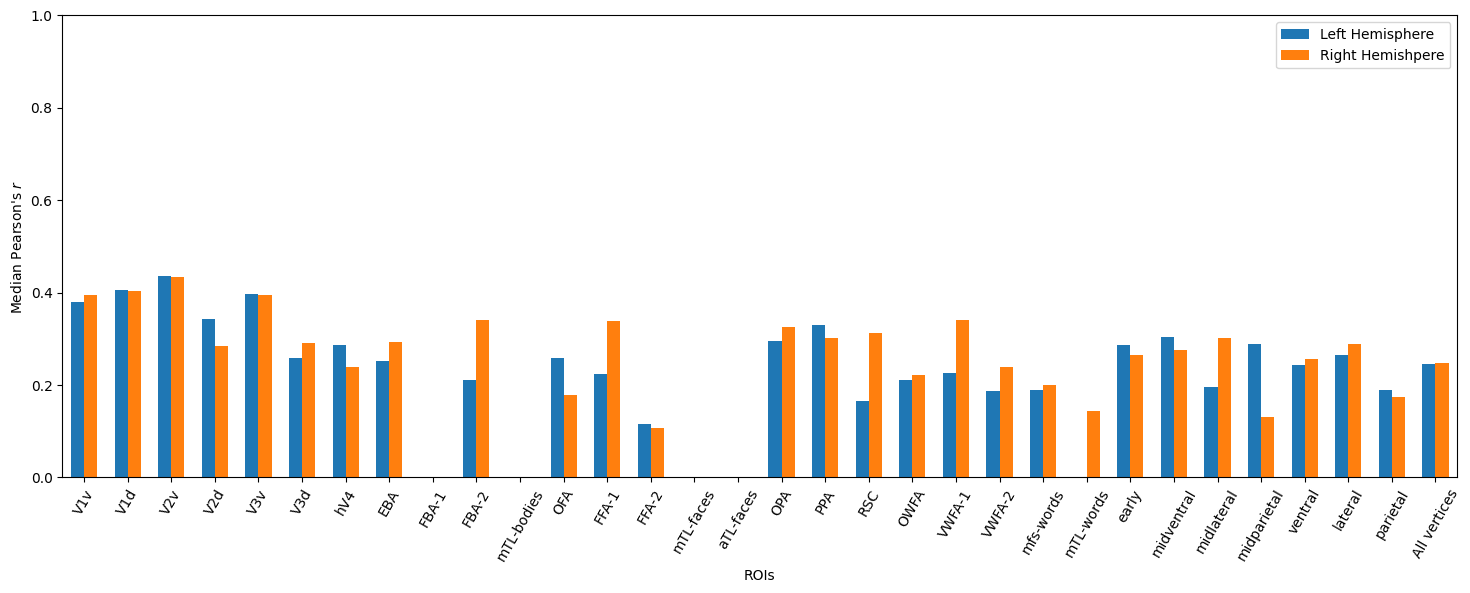

Running for subject 8
Training images: 8779
Test images: 395
LH training fMRI data shape:
(8779, 18981)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(8779, 20530)
(Training stimulus images × RH vertices)
Training images: 8779
Test images: 395
Training stimulus images: 7901

Validation stimulus images: 878

Test stimulus images: 395
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 27/27 [01:32<00:00,  3.43s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 2/2 [00:01<00:00,  1.33it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 18981/18981 [00:00<00:00, 25138.56it/s]


Calculating right hemisphere correlations...


100%|██████████| 20530/20530 [00:00<00:00, 24918.56it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 8

LH Correlation: 0.14557335685118666 RH Correlation: 0.14970304916788418

LH median roi correlation: 
{'V1v': 0.3892612144548163, 'V1d': 0.428213330207967, 'V2v': 0.33600583471128787, 'V2d': 0.23930211930978712, 'V3v': 0.29665455545088465, 'V3d': 0.1753217627864988, 'hV4': 0.29263434593341897, 'EBA': 0.141024068916375, 'FBA-1': 0.0840785589489221, 'FBA-2': 0.19029188680648382, 'mTL-bodies': None, 'OFA': 0.2040900820195713, 'FFA-1': 0.1777447829414298, 'FFA-2': 0.16483125535243925, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.16430590067458603, 'PPA': 0.20408948800788404, 'RSC': 0.19186332901709327, 'OWFA': 0.15491765126792537, 'VWFA-1': 0.07032559351229886, 'VWFA-2': 0.02461611406142417, 'mfs-words': 0.07075481987135192, 'mTL-words': None, 'early': 0.18899348964089296, 'midventral': 0.23407092898386583, 'midlateral': 0.1778335074345647, 'midparietal': 0.16159460809936044, 'ventral': 0.14605445676642187, 'lateral': 0.115536257536

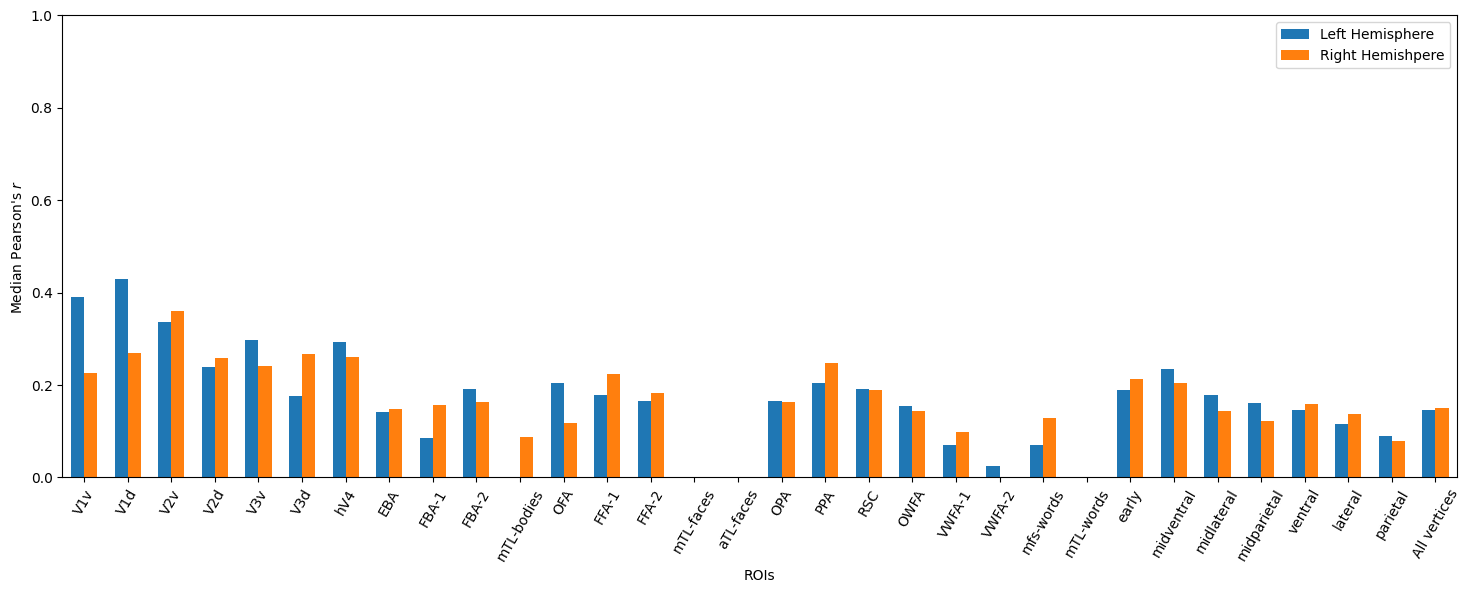

In [7]:
from src.algonauts.pipelines.tf_pipeline import run_tf_pipeline

run_tf_pipeline(batch_size=batch_size, model_loader=model_loader, layers=layers, subjects=subjects,
                challenge_data_dir=challenge_data_dir,
                exp_output_dir=exp_output_dir)